In [9]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [10]:
data=pd.read_csv('CleanedAirQuality.csv')
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [11]:
# Convert Date and Time columns to datetime and creating a new column called DateTime
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

In [12]:
data.head(2)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime
0,2004-03-10,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,2004-03-10,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00


In [13]:
# Set Datetime as index
data.set_index('Datetime', inplace=True)

In [14]:
# Summarize daily average pollution levels
daily_pollution = data[['CO(GT)','NMHC(GT)','C6H6(GT)','NOx(GT)','NO2(GT)']].resample('D').mean()

In [20]:
# Identify worst days for pollutants
worst_days = daily_pollution.idxmax()
print("Worst Days for Each Pollutant:/n")
print("POLLUTANT           DATE")
worst_days

Worst Days for Each Pollutant:/n
POLLUTANT           DATE


CO(GT)     2004-12-24
NMHC(GT)   2004-04-23
C6H6(GT)   2004-11-23
NOx(GT)    2004-11-23
NO2(GT)    2005-02-11
dtype: datetime64[ns]

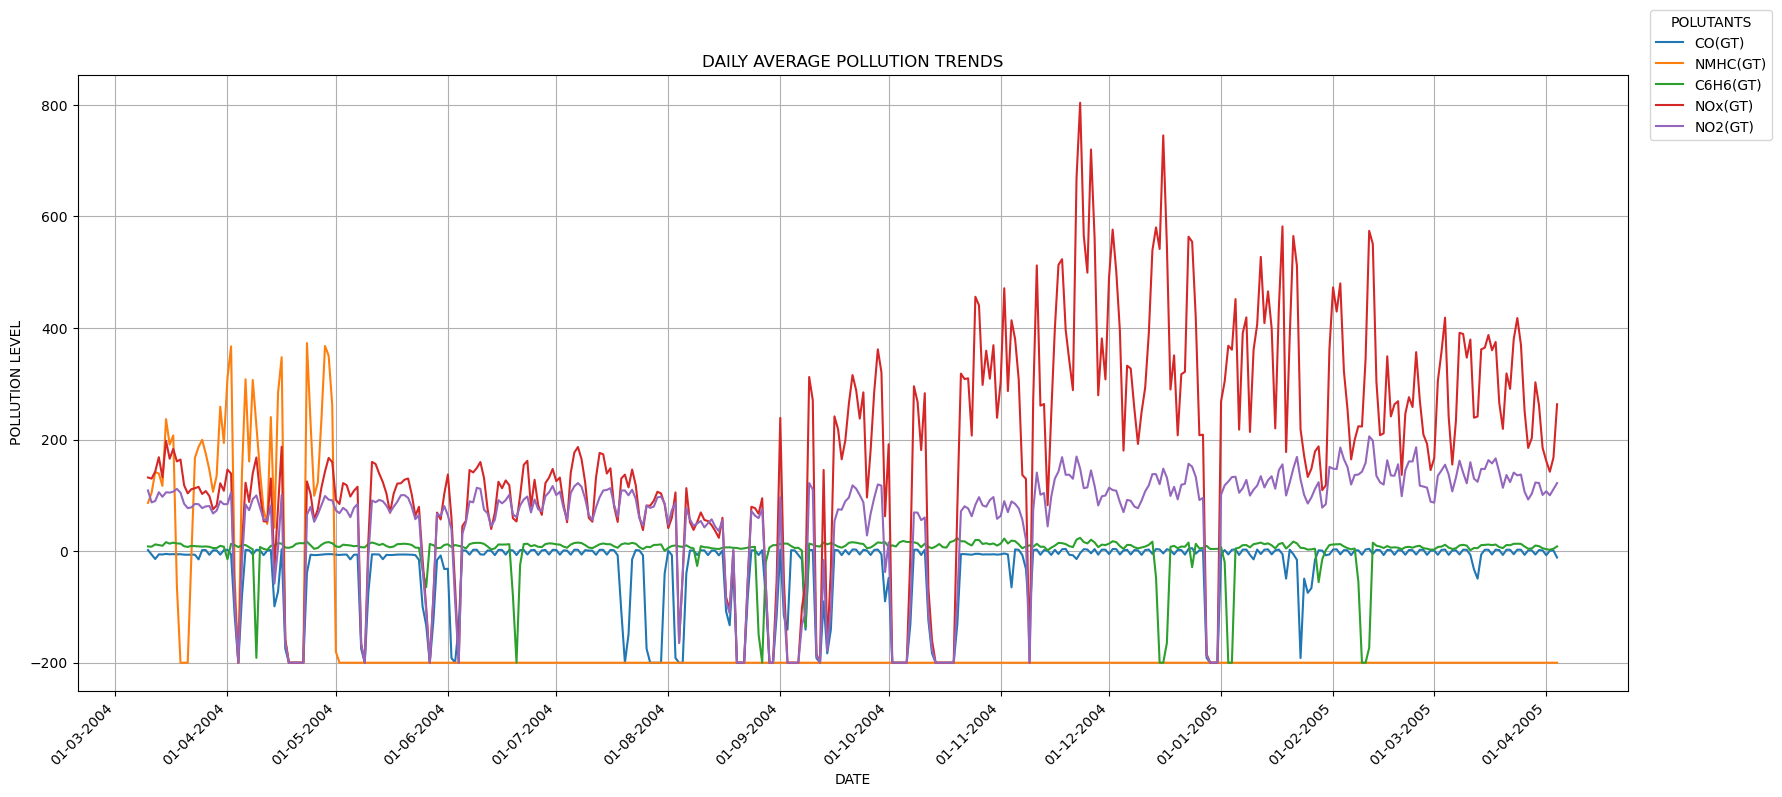

In [27]:
# Ploting daily pollution trends
plt.figure(figsize=(20, 8))
for column in daily_pollution.columns:
    sns.lineplot(data=daily_pollution[column], label=column)

plt.title('DAILY AVERAGE POLLUTION TRENDS')
plt.xlabel('DATE')
plt.ylabel('POLLUTION LEVEL')
#plt.legend(title="POLLUTANTS")
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45, ha='right')
plt.legend(title='POLUTANTS',bbox_to_anchor=(1.01,1), loc='center left')
plt.show()

In [29]:
# Analyze hourly trends
hourly_pollution = data[['CO(GT)','NMHC(GT)','C6H6(GT)','NOx(GT)','NO2(GT)']].groupby(data.index.hour).mean()

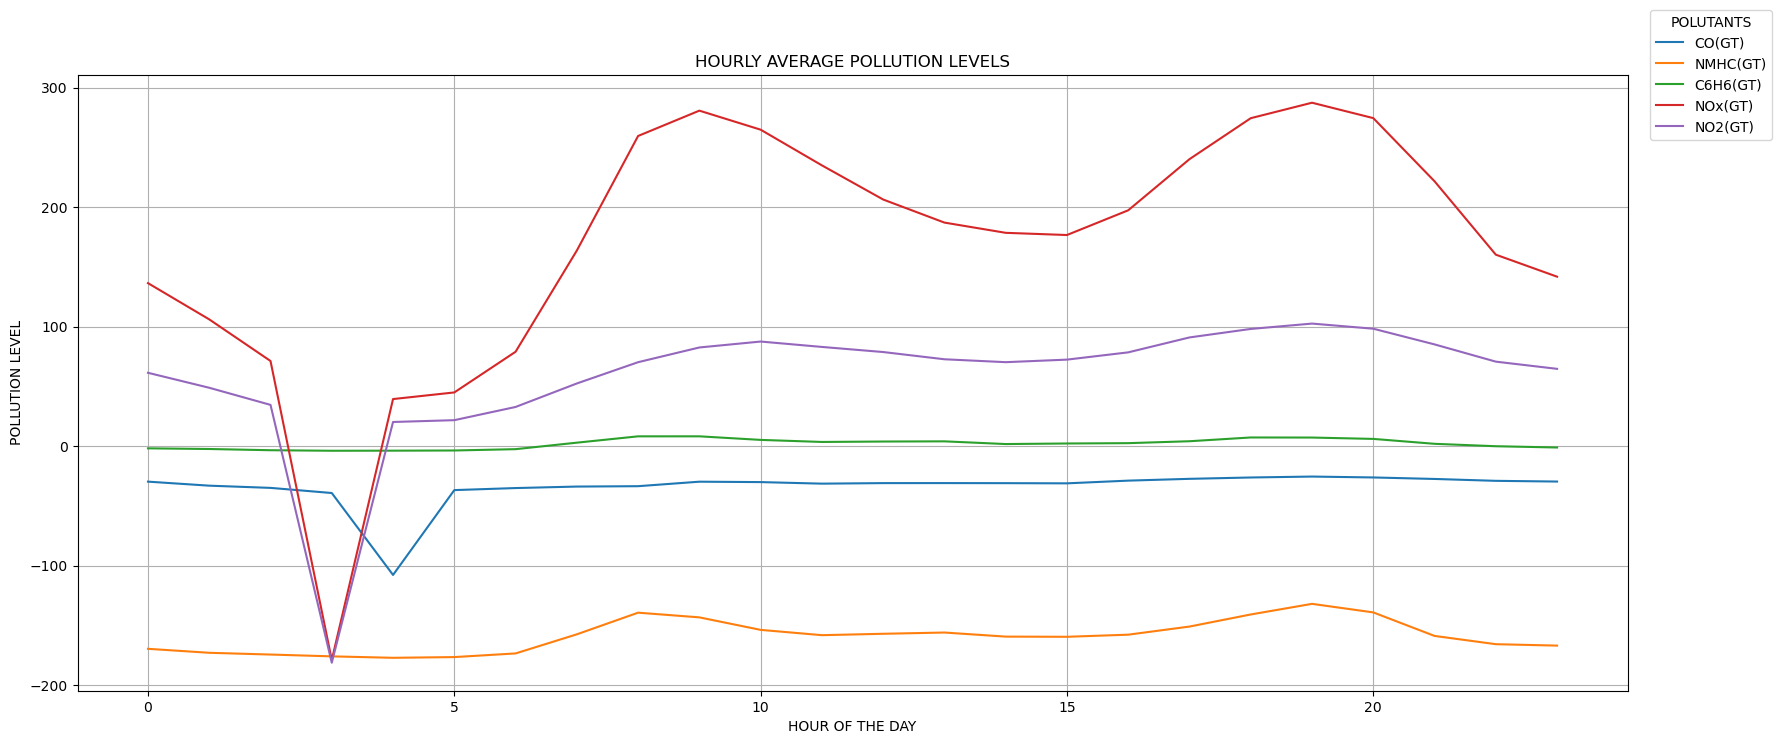

In [33]:
# Plot hourly pollution patterns
plt.figure(figsize=(20, 8))
for column in hourly_pollution.columns:
    sns.lineplot(data=hourly_pollution[column], label=column)

plt.title('HOURLY AVERAGE POLLUTION LEVELS')
plt.xlabel('HOUR OF THE DAY')
plt.ylabel('POLLUTION LEVEL')
plt.legend(title="POLLUTANTS")
plt.grid(True)
plt.legend(title='POLUTANTS',bbox_to_anchor=(1.01,1), loc='center left')
plt.show()

In [33]:
# Recommendations based on analysis
recommendations = """
\033[1m----------------------------------------------------------RECOMMENDATIONS-------------------------------------------------------------------\033[0m

\033[1m1. Implement Traffic Restrictions:\033[0m
Enforce traffic limitations during peak pollution hours, such as early morning and evening rush periods, to reduce vehicular emissions.

\033[1m2. Promote Public Transportation:\033[0m
Enhance public transportation systems and incentivize their use to decrease the number of private vehicles on the road.

\033[1m3. Increase Green Spaces:\033[0m
Develop more parks, green belts, and urban forests to naturally absorb pollutants and improve air quality.

\033[1m4. Enforce Industrial Emission Controls:\033[0m
Strengthen regulations for industrial emissions, especially during periods identified as high-pollution days.

\033[1m5. Launch Public Awareness Campaigns:\033[0m
Educate communities about pollution peaks and suggest protective measures to minimize exposure during high-risk times.

\033[1m6. Encourage Flexible Work Hours:\033[0m
Promote staggered or remote work options to distribute traffic evenly and avoid rush-hour congestion.

\033[1m7. Establish Low Emission Zones (LEZs):\033[0m
Restrict or levy fees on high-emission vehicles in designated areas with heavy pollution to encourage cleaner alternatives.

\033[1m8. Adopt Smart Urban Planning:\033[0m
Design city layouts that separate residential areas from industrial zones and high-traffic corridors to reduce direct pollutant exposure.

\033[1m9. Incentivize Renewable Energy Adoption:\033[0m
Encourage businesses and households to shift to renewable energy sources like solar and wind to cut down on emissions from fossil fuels.

\033[1m10. Strengthen Monitoring and Data Utilization:\033[0m
Expand air quality monitoring networks and use real-time data to trigger alerts and inform mitigation strategies dynamically.
"""

print(recommendations)


----------------------------------------------------------RECOMMENDATIONS-------------------------------------------------------------------

1. Implement Traffic Restrictions:
Enforce traffic limitations during peak pollution hours, such as early morning and evening rush periods, to reduce vehicular emissions.

2. Promote Public Transportation:
Enhance public transportation systems and incentivize their use to decrease the number of private vehicles on the road.

3. Increase Green Spaces:
Develop more parks, green belts, and urban forests to naturally absorb pollutants and improve air quality.

4. Enforce Industrial Emission Controls:
Strengthen regulations for industrial emissions, especially during periods identified as high-pollution days.

5. Launch Public Awareness Campaigns:
Educate communities about pollution peaks and suggest protective measures to minimize exposure during high-risk times.

6. Encourage Flexible Work Hours:
Promote staggered or remote work options to distribu